In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

D:\toolkits.win\conda\envs\fastai\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = "data\\fabric\\fabrics\\"
sz=400

In [5]:
torch.cuda.is_available()

True

In [6]:
torch.backends.cudnn.enabled

True

In [7]:
os.listdir(PATH)

['models', 'tmp', 'train', 'valid']

In [8]:
os.listdir(f'{PATH}valid')

['Acrylic',
 'Artificial_fur',
 'Artificial_leather',
 'Blended',
 'Chenille',
 'Corduroy',
 'Cotton',
 'Crepe',
 'Denim',
 'Felt',
 'Fleece',
 'Leather',
 'Linen',
 'Lut',
 'Nylon',
 'Polyester',
 'Satin',
 'Silk',
 'Suede',
 'Terrycloth',
 'Velvet',
 'Viscose',
 'Wool']

In [9]:
files = os.listdir(f'{PATH}valid/Blended')[:5]
files

['1.png', '1062.png', '1064.png', '1068.png', '1071.png']

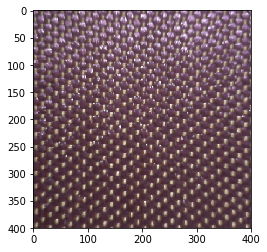

In [10]:
img = plt.imread(f'{PATH}valid/Blended/{files[0]}')
plt.imshow(img);

In [11]:
img.shape

(400, 400, 3)

In [12]:
img[:4,:4]

array([[[0.64706, 0.48627, 0.6549 ],
        [0.64706, 0.48627, 0.6549 ],
        [0.64314, 0.49412, 0.65098],
        [0.65098, 0.49804, 0.6549 ]],

       [[0.69804, 0.57647, 0.72549],
        [0.6902 , 0.56863, 0.71765],
        [0.66275, 0.51373, 0.67059],
        [0.64314, 0.49412, 0.65098]],

       [[0.71373, 0.6    , 0.75686],
        [0.72157, 0.60392, 0.76078],
        [0.65098, 0.5098 , 0.66667],
        [0.61569, 0.47451, 0.62745]],

       [[0.68627, 0.59216, 0.72941],
        [0.69804, 0.60392, 0.74118],
        [0.63922, 0.49804, 0.65098],
        [0.6    , 0.45882, 0.61569]]], dtype=float32)

In [13]:
arch=dn161
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:23<00:00,  1.78s/it]


In [14]:
lrf=learn.lr_find()

 78%|██████████████████████████████████████████████████████▎               | 80/103 [00:01<00:00, 77.95it/s, loss=16.7]


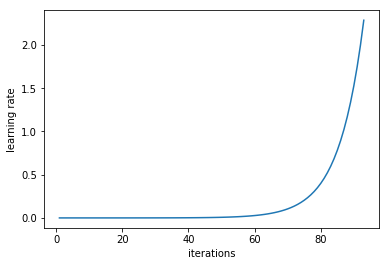

In [15]:
learn.sched.plot_lr()

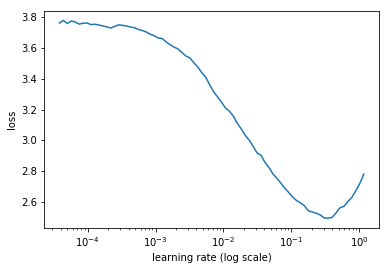

In [16]:
learn.sched.plot()

In [17]:
learn.fit(0.01,10)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.375407   1.078857   0.598494  
    1      0.905843   0.826538   0.700125                                                                              
    2      0.734694   0.729079   0.728984                                                                              
    3      0.624575   0.718187   0.723965                                                                              
    4      0.571497   0.603379   0.769134                                                                              
    5      0.510837   0.612046   0.76537                                                                               
    6      0.480969   0.546121   0.782936                                                                              
    7      0.430778   0.525297   0.7867                                                                             

[array([0.5159]), 0.8005018828803653]

In [17]:
learn.fit(0.05,10)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.34473    0.999822   0.627353  
    1      0.950932   0.752566   0.721455                                                                              
    2      0.712706   0.757908   0.72271                                                                               
    3      0.613024   0.588834   0.791719                                                                              
    4      0.527042   0.534337   0.795483                                                                              
    5      0.46462    0.535234   0.796738                                                                              
    6      0.413538   0.481986   0.828105                                                                              
    7      0.398078   0.480949   0.823087                                                                           

[array([0.4143]), 0.838143037209098]

In [18]:
learn.fit(0.01,5)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.233534   0.369519   0.849435  
    1      0.213938   0.376853   0.848181                                                                              
    2      0.197933   0.356309   0.854454                                                                              
    3      0.194227   0.352188   0.861982                                                                              
    4      0.184917   0.352592   0.85069                                                                               



[array([0.35259]), 0.8506900886520089]

In [19]:
learn.fit(0.001,5)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.173914   0.33461    0.858218  
    1      0.166144   0.343105   0.856964                                                                              
    2      0.177972   0.337494   0.854454                                                                              
    3      0.173376   0.347948   0.855709                                                                              
    4      0.167108   0.343448   0.853199                                                                              



[array([0.34345]), 0.8531994989405911]